In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import datasets, layers, models

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [8]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### Loading Dataset

In [48]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [49]:
X_train.shape

(50000, 32, 32, 3)

In [53]:
Y_train.shape

(50000, 1)

In [50]:
X_test.shape

(10000, 32, 32, 3)

In [54]:
Y_test.shape

(10000, 1)

In [52]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

#so the above array is 2D we need to convert it into 1D

In [55]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [56]:
Y_test = Y_test.reshape(-1,)

In [57]:
names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [58]:
names[2]

'bird'

In [59]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(names[Y[index]])

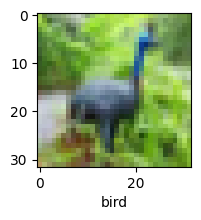

In [62]:
plot_sample(X_train, Y_train, 6)

### Normalizing Training Data

In [63]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [64]:
#normalizing array
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [65]:
#Therefore
X_train = X_train/255
X_test = X_test/255

## Building CNN

In [67]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [74]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
cnn.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 61s 38ms/step - loss: 0.5639 - accuracy: 0.8017
Epoch 2/15
1563/1563 [==============================] - 60s 38ms/step - loss: 0.5248 - accuracy: 0.8140
Epoch 3/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.4956 - accuracy: 0.8247
Epoch 4/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.4686 - accuracy: 0.8341
Epoch 5/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.4376 - accuracy: 0.8445
Epoch 6/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.4146 - accuracy: 0.8535
Epoch 7/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.3887 - accuracy: 0.8609
Epoch 8/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.3650 - accuracy: 0.8700
Epoch 9/15
1563/1563 [==============================] - 54s 34ms/step - loss: 0.3441 - accuracy: 0.8775
Epoch 10/15
1563/1563 [==============================] - 53s 34m

In [76]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 9s 12ms/step - loss: 1.5429 - accuracy: 0.6769


[1.5429447889328003, 0.6769000291824341]

In [77]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 12ms/step


array([[5.17219378e-10, 1.15868211e-10, 1.25762554e-07, 9.99701560e-01,
        1.97688554e-09, 2.97890394e-04, 2.71886591e-07, 2.95032304e-10,
        6.69729445e-08, 5.11691078e-10],
       [4.69699586e-07, 9.75421135e-05, 6.18472440e-10, 9.17625097e-15,
        2.09428243e-12, 3.95702009e-19, 2.16299875e-14, 7.71390188e-21,
        9.99902010e-01, 3.68402908e-09],
       [3.91842285e-03, 1.03439754e-02, 1.12755624e-05, 4.15795548e-05,
        4.03246531e-07, 2.25507250e-07, 2.38889129e-06, 1.91073575e-08,
        9.85669792e-01, 1.19008637e-05],
       [9.06964779e-01, 1.91039406e-03, 5.93413017e-04, 1.69819996e-05,
        1.18541251e-07, 2.59315694e-11, 1.09760716e-08, 1.13496736e-13,
        9.05126855e-02, 1.62048377e-06],
       [2.32144096e-11, 1.28793687e-07, 7.60993498e-05, 3.28678812e-04,
        4.41993743e-01, 1.46566263e-05, 5.57561398e-01, 1.55454331e-14,
        2.52230529e-05, 3.32719186e-09]], dtype=float32)

In [84]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [85]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

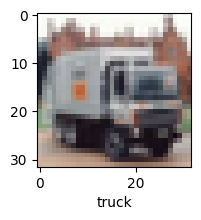

In [107]:
plot_sample(X_test, Y_test,11)

In [108]:
names[y_classes[11]]

'truck'